<a href="https://colab.research.google.com/github/AravindBiswas/MyStudy/blob/master/Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the data
df = pd.read_csv('/content/glass.csv')

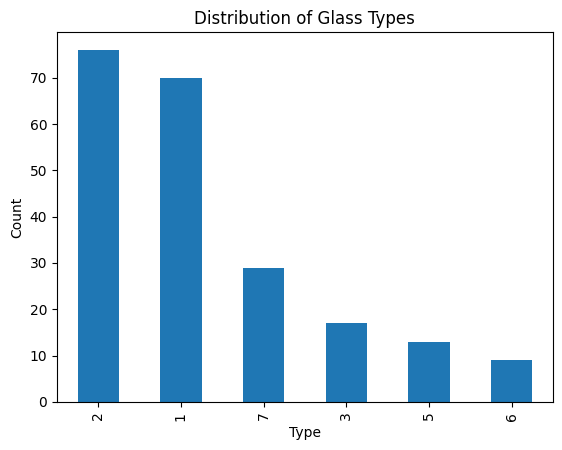

In [3]:
# Make a bar plot of different types of glasses
df['Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Glass Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [4]:
# Split data into features and target variable
X = df.drop('Type', axis=1)
y = df['Type']

In [5]:
# Make a train_test split and fit a single decision tree classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy:.2f}')

Decision Tree Accuracy: 0.72


In [6]:
# Make a k-fold split with 3 splits and measure the accuracy score with each split
kf = KFold(n_splits=3, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'K-Fold Accuracy: {accuracy:.2f}')

K-Fold Accuracy: 0.69
K-Fold Accuracy: 0.69
K-Fold Accuracy: 0.68


In [7]:
# Use gridSearchCV for finding out a suitable number of estimators for a RandomForestClassifer
param_grid = {'n_estimators': range(10, 100, 10)}
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=10)
grid_search.fit(X, y)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.2f}')

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Best Parameters: {'n_estimators': 90}
Best Score: 0.75


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
# Load the data
df = pd.read_csv('/content/glass.csv')

In [10]:
# Split data into features and target variable
X = df.drop('Type', axis=1)
y = df['Type']

In [11]:
# Apply StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # retain 95% of the variance
X = pca.fit_transform(X)

In [13]:
# Make a train_test split and fit a single decision tree classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Make a k-fold split with 3 splits and measure the accuracy score with each split
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'K-Fold Accuracy: {accuracy:.2f}')

K-Fold Accuracy: 0.62
K-Fold Accuracy: 0.58
K-Fold Accuracy: 0.56


In [15]:
# Use gridSearchCV for finding out a suitable number of estimators for a RandomForestClassifer
param_grid = {'n_estimators': range(10, 100, 10)}
model = RandomForestClassifier(random_state=42, n_jobs=-1)  # use all available cores
grid_search = GridSearchCV(model, param_grid, cv=10, n_jobs=-1)  # use all available cores
grid_search.fit(X, y)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.2f}')

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Best Parameters: {'n_estimators': 50}
Best Score: 0.66
